In [16]:
import numpy as np
import pandas as pd

### Import Library

In [4]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
from scipy import signal

### Noise는 Energy 이므로 Noise가 섞이면 Energy는 비정상 증가 -> Power Spectral Density 추적

In [12]:
def psd_score(ecg,tag = 0):
    paral_results = parallelizing_sig(ecg)
    #partial_norm_result = partial_normalizing_sig(paral_results)
    
    half_index = (sum(abs(paral_results[0:int(len(paral_results)/2)]))+ 1e-10)/(sum(abs(paral_results[int(len(paral_results)/2):]))+ 1e-10)
    
    freqs, psd = signal.welch(paral_results)
    if(tag == 1):
        plt.plot(ecg)
        plt.show()
        plt.plot(paral_results)
        plt.show()
        plt.plot(psd)
        plt.show()
    power_index = sum(psd)
    wave_form_index = (sum(psd[25:50])+ 1e-10)/(sum(psd[0:25])+ 1e-10)
    ratio_index = power_index * wave_form_index
    
    return power_index,wave_form_index,ratio_index,half_index

In [14]:
calc = lambda x : psd_score(x)
#vectorized_calc = np.vectorize(calc)

In [17]:
feature = np.array(list(map(calc, _3sec_ex_signal_arr_spatch)))

In [815]:
_3sec_paral_results = np.array(list(map(parallelizing_sig, _3sec_ex_signal_arr_spatch)))

In [840]:
_3sec_paral_feature = np.array(list(map(calc, _3sec_paral_results)))

In [869]:
feature.shape

(42600, 4)

In [18]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)
res = Kmean.fit_predict(feature)

In [19]:
res[150:180]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
import seaborn as sns

In [21]:
def make_subplot_layout(signal,res,cluster,row=5,col=5):
    _index = np.where(res == cluster)
    cluster_signal = signal[_index[0][:row*col]]
    plt.figure(figsize=(12,8))
    for i in range(len(cluster_signal)) : 
        plt.subplot(row,col,i+1) 
        plt.plot(cluster_signal[i])
    plt.show()

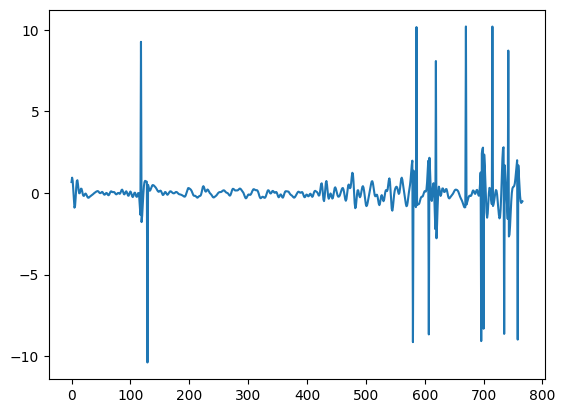

In [66]:
plt.plot(np.diff(_3sec_ex_signal_arr_spatch[12522]))
plt.show()

### Short (1s)

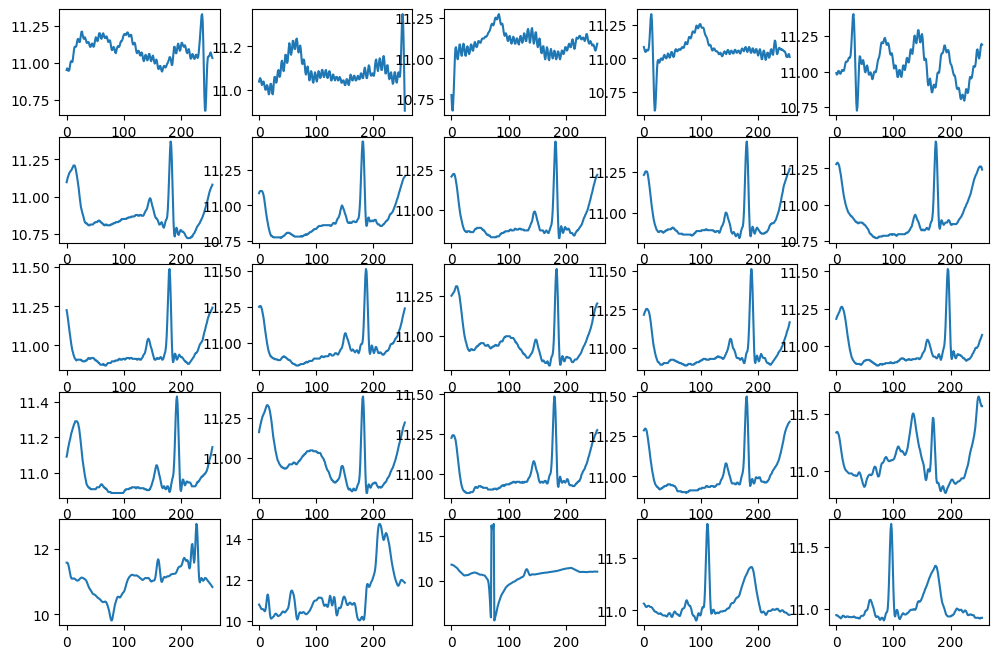

In [895]:
make_subplot_layout(_1sec_ex_signal_arr_spatch,res,0)

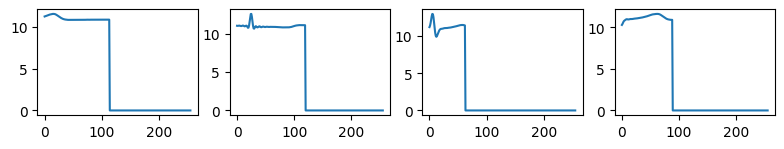

In [893]:
make_subplot_layout(_1sec_ex_signal_arr_spatch,res,1)

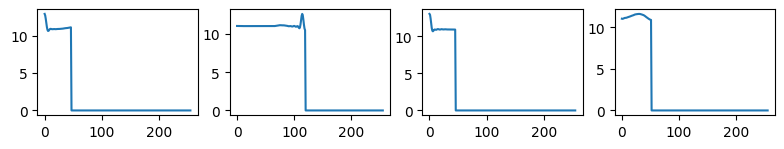

In [897]:
make_subplot_layout(_1sec_ex_signal_arr_spatch,res,2)

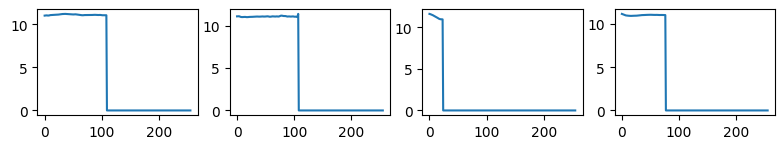

In [898]:
make_subplot_layout(_1sec_ex_signal_arr_spatch,res,3)

### Short (3s)

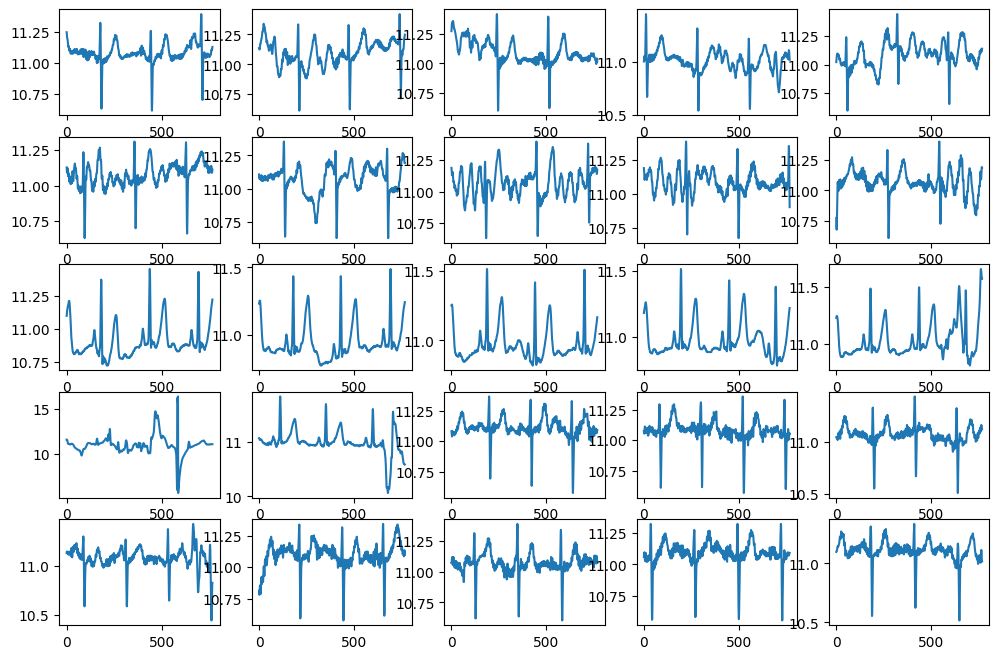

In [22]:
make_subplot_layout(_3sec_ex_signal_arr_spatch,res,0)

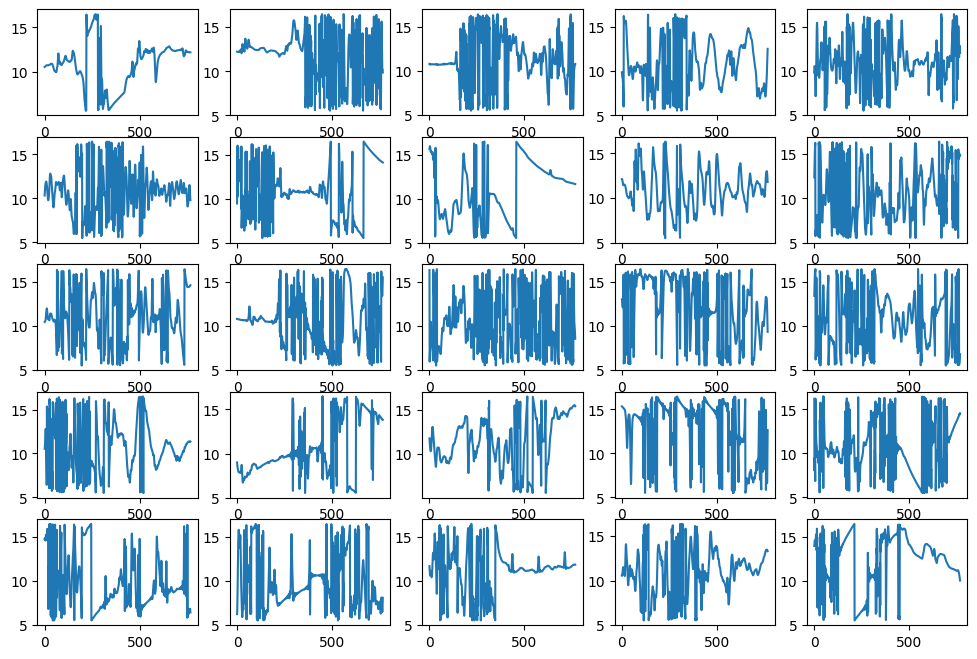

In [23]:
make_subplot_layout(_3sec_ex_signal_arr_spatch,res,1)

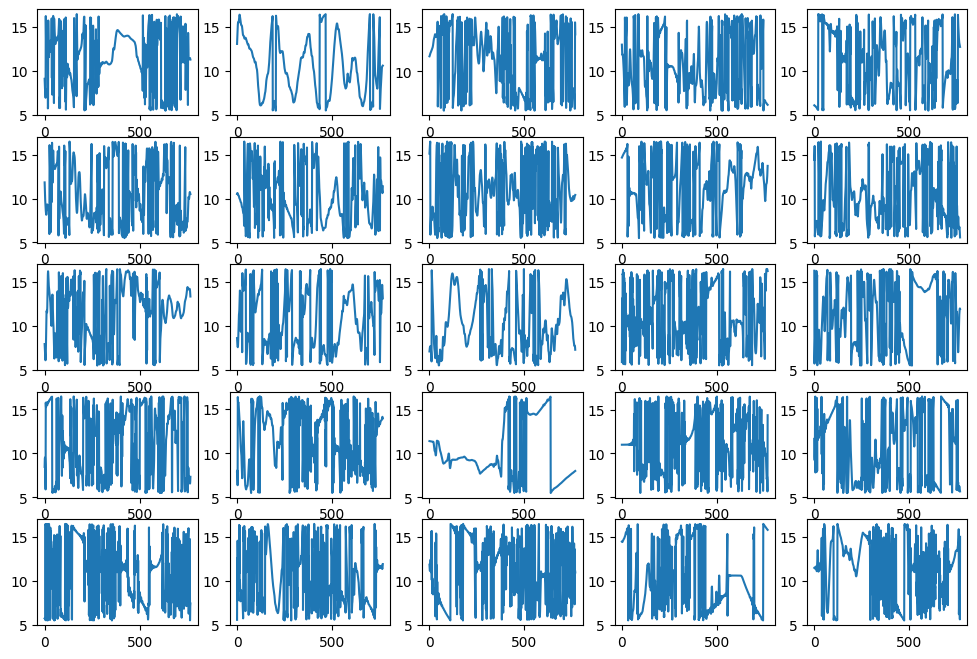

In [24]:
make_subplot_layout(_3sec_ex_signal_arr_spatch,res,2)

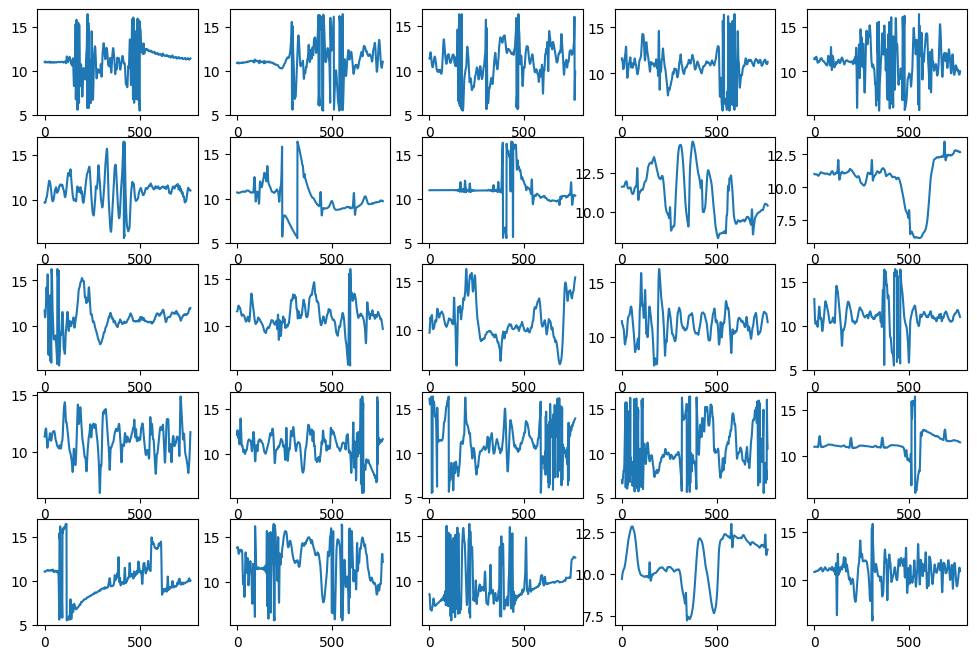

In [25]:
make_subplot_layout(_3sec_ex_signal_arr_spatch,res,3)

### Paral Results 적용

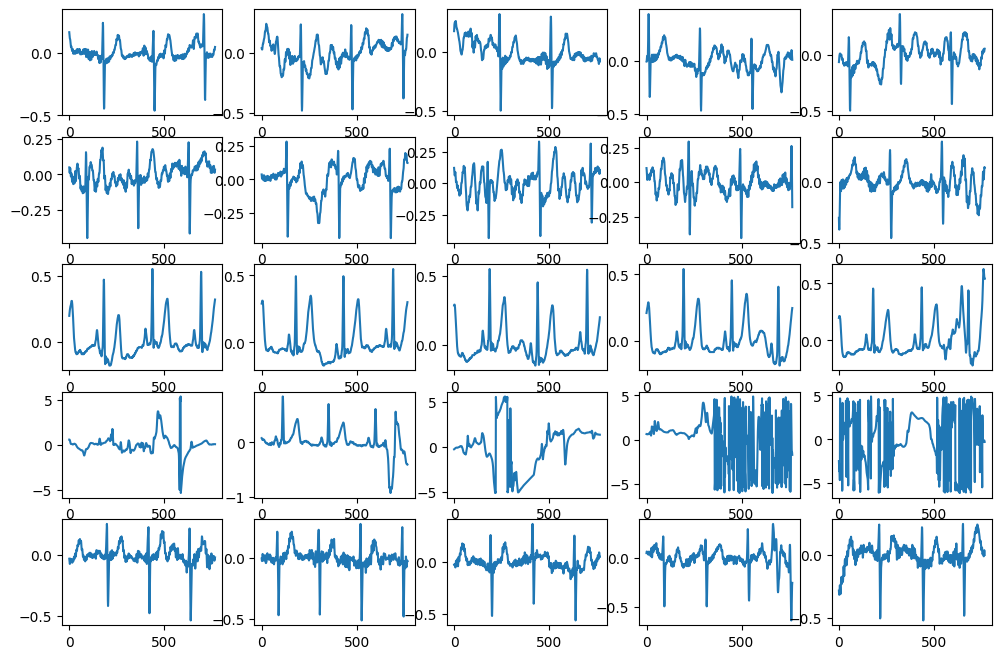

In [843]:
make_subplot_layout(_3sec_paral_results,res,0)

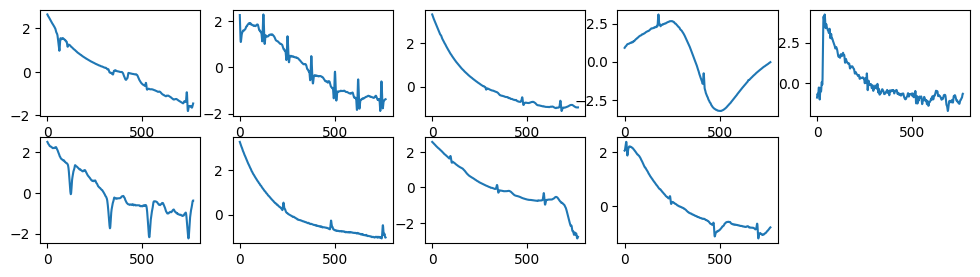

In [844]:
make_subplot_layout(_3sec_paral_results,res,1)

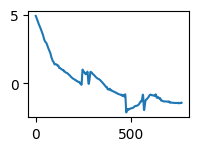

In [845]:
make_subplot_layout(_3sec_paral_results,res,2)

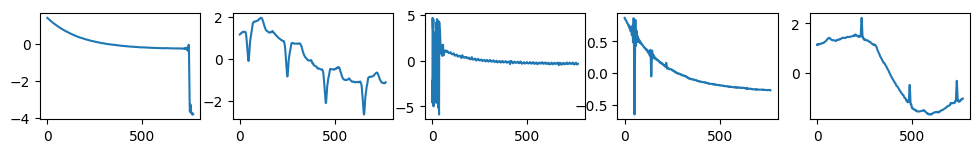

In [846]:
make_subplot_layout(_3sec_paral_results,res,3)

### Long(30sec)

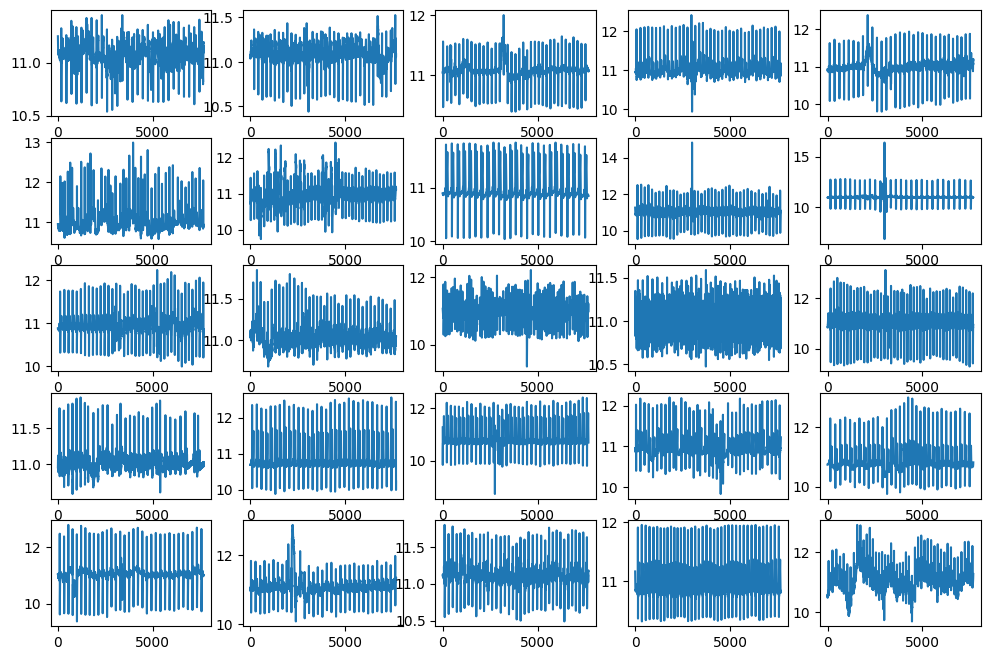

In [804]:
make_subplot_layout(ex_signal_arr_spatch,res,0)

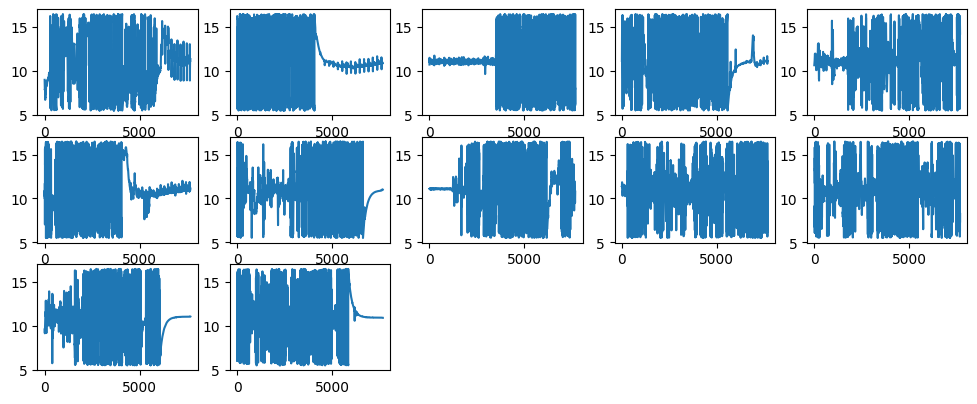

In [805]:
make_subplot_layout(ex_signal_arr_spatch,res,1)

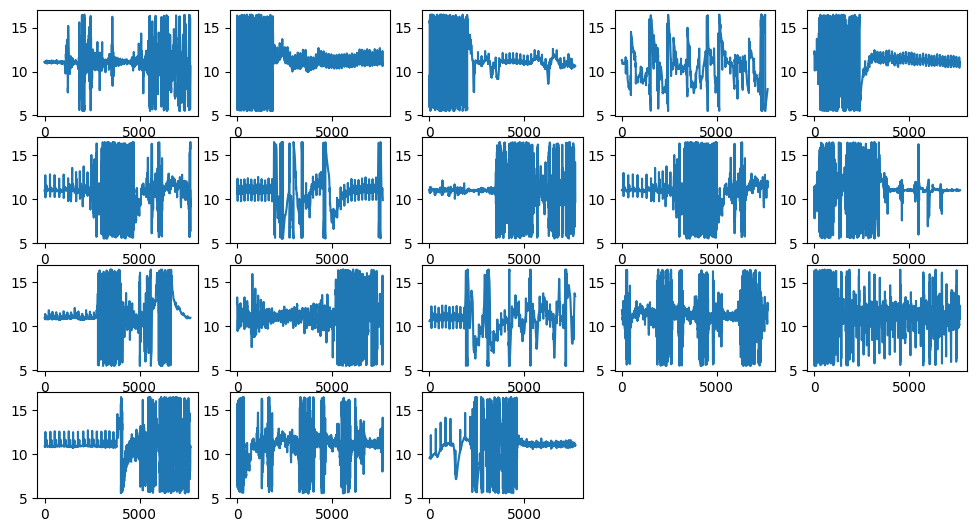

In [806]:
make_subplot_layout(ex_signal_arr_spatch,res,2)

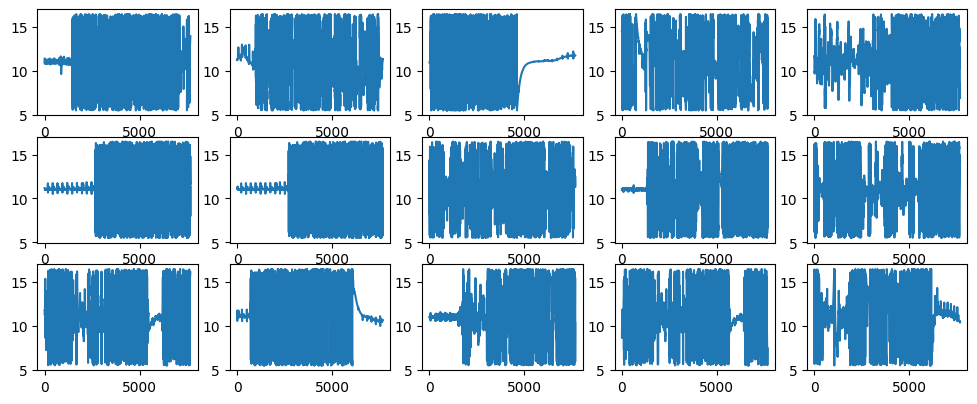

In [807]:
make_subplot_layout(ex_signal_arr_spatch,res,3)

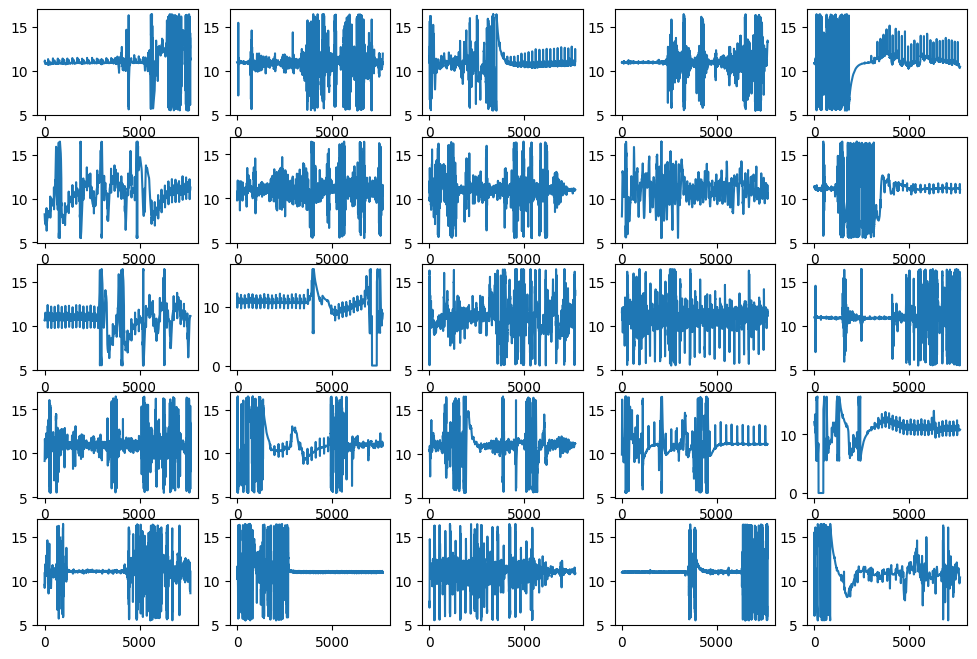

In [808]:
make_subplot_layout(ex_signal_arr_spatch,res,4)

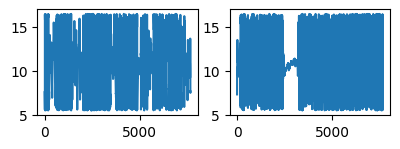

In [809]:
make_subplot_layout(ex_signal_arr_spatch,res,5)

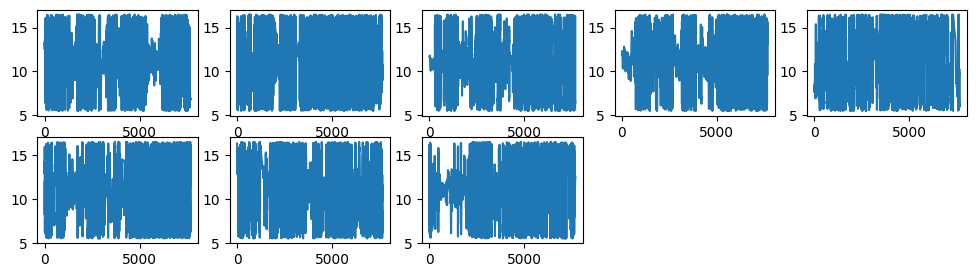

In [810]:
make_subplot_layout(ex_signal_arr_spatch,res,6)

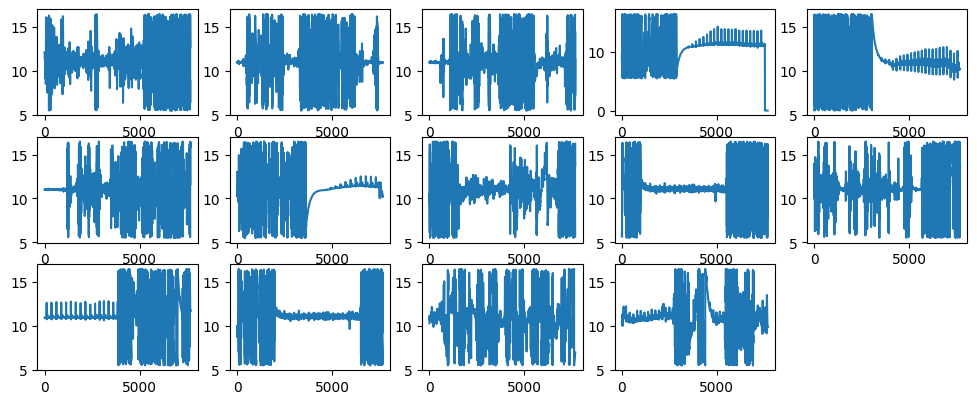

In [811]:
make_subplot_layout(ex_signal_arr_spatch,res,7)

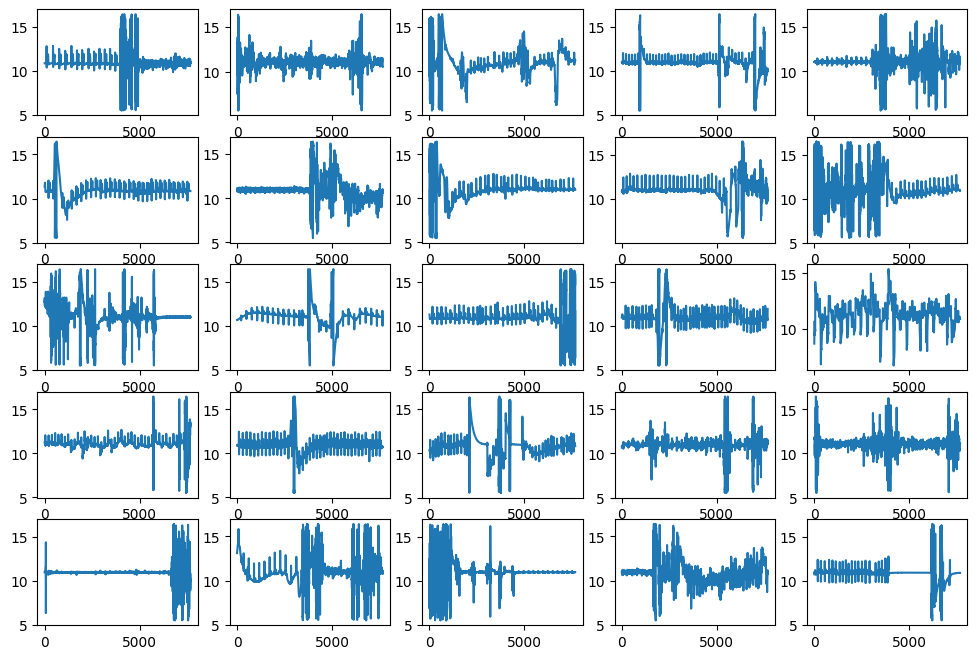

In [812]:
make_subplot_layout(ex_signal_arr_spatch,res,8)

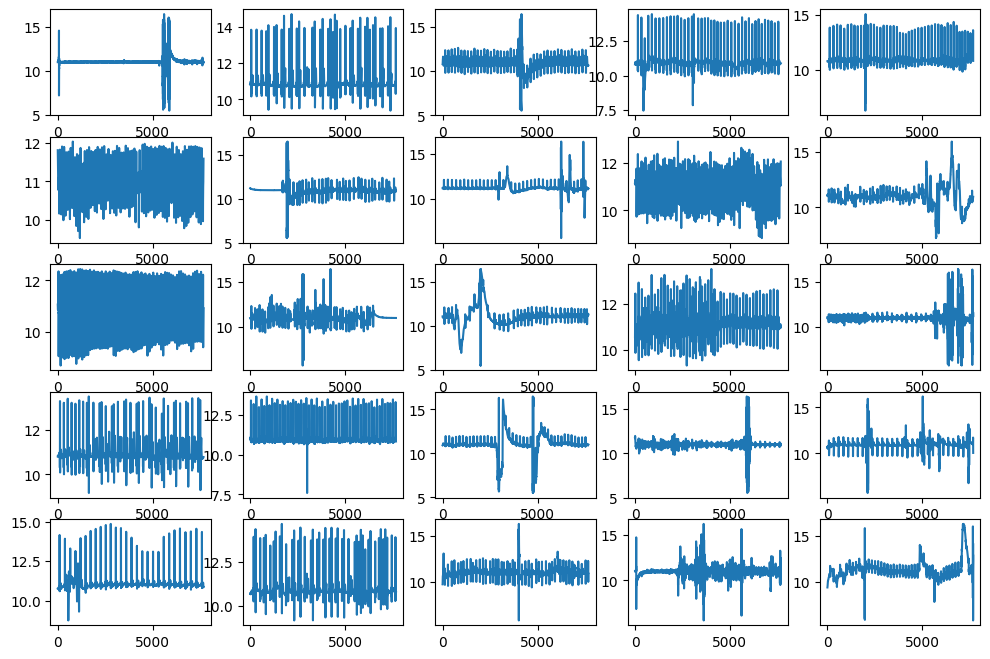

In [813]:
make_subplot_layout(ex_signal_arr_spatch,res,9)

#### 정상 Sample 범위 ( psd : 0 ~ 20 )

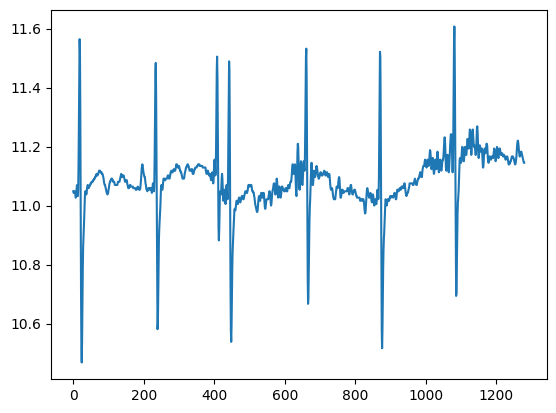

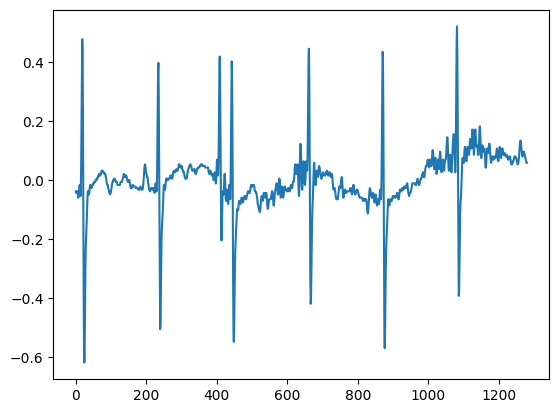

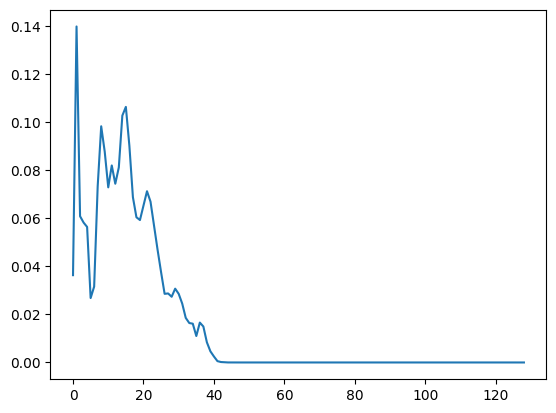

CPU times: user 419 ms, sys: 490 ms, total: 909 ms
Wall time: 322 ms


(2.08946273579096, 0.17813012090895589, 0.3721962497612014, 0.7684297811039551)

In [575]:
%%time
psd_score(ex_signal_arr_spatch[5][:1280],1) #2점대는 정상

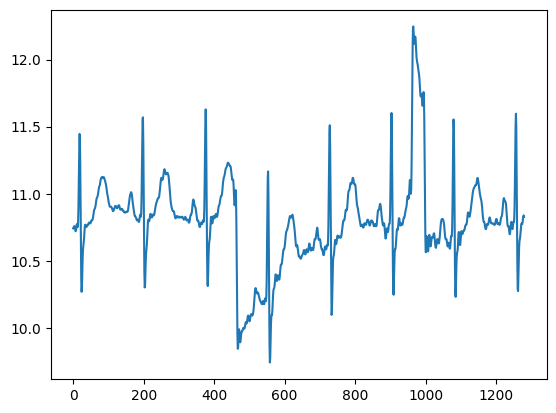

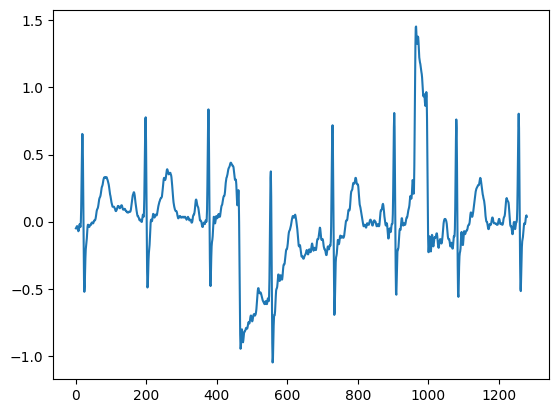

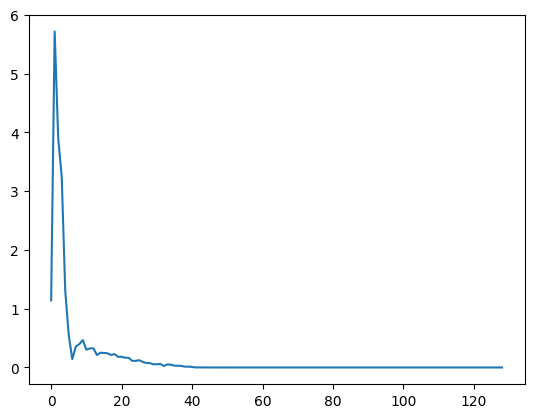

(21.277997553771506,
 0.03850944085279367,
 0.8194037882628522,
 1.2432325006001201)

In [576]:
psd_score(ex_signal_arr_spatch[10][:1280],1) #5점대는 정상

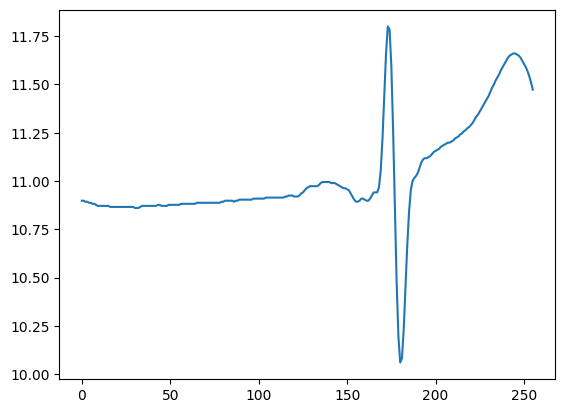

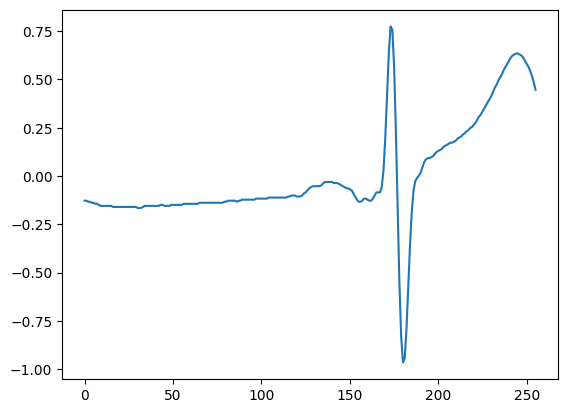

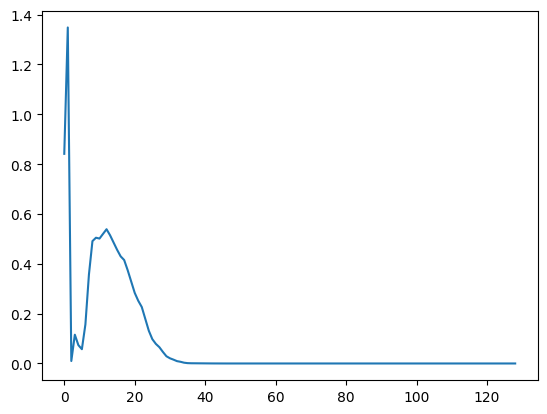

(9.966095969916882,
 0.03934292825901958,
 0.3920953987669441,
 0.5059851117595593)

In [578]:
psd_score(ex_signal_arr_spatch[11][:256],1) #15점대는 정상

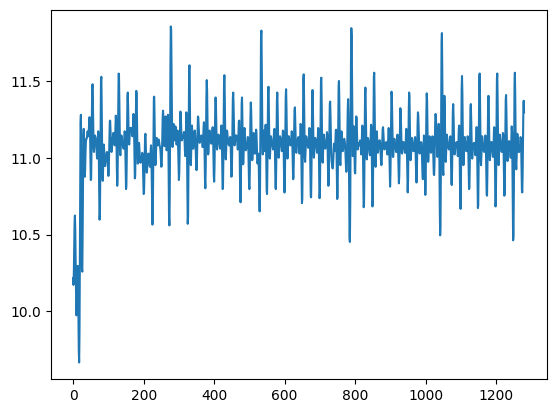

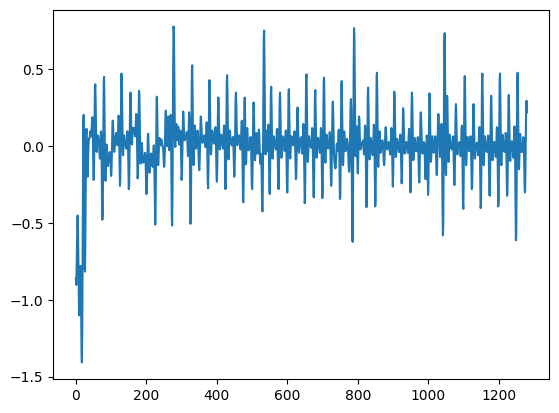

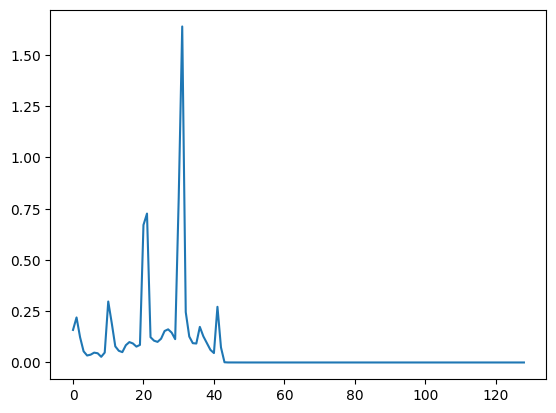

(8.176884338103061, 1.2469289754612993, 10.195994010176396, 1.2362704007872967)

In [579]:
psd_score(ex_signal_arr_spatch[467][:1280],1) #8점 정상 범위

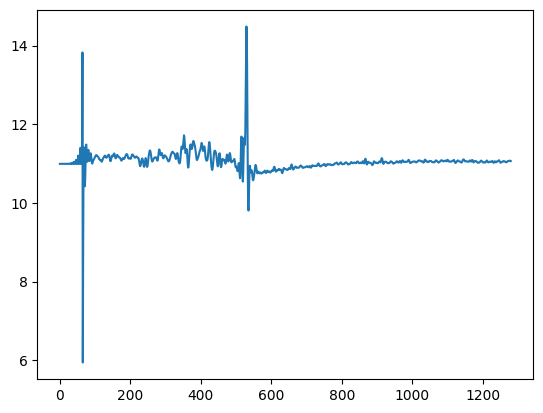

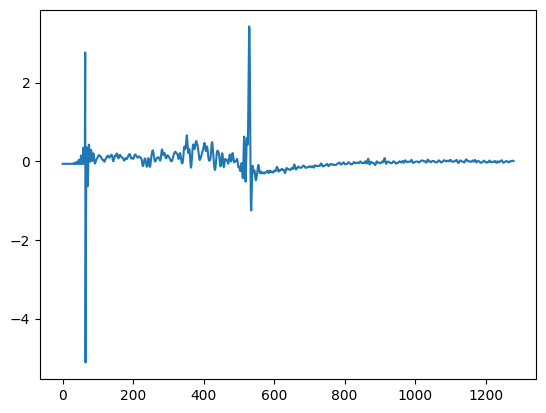

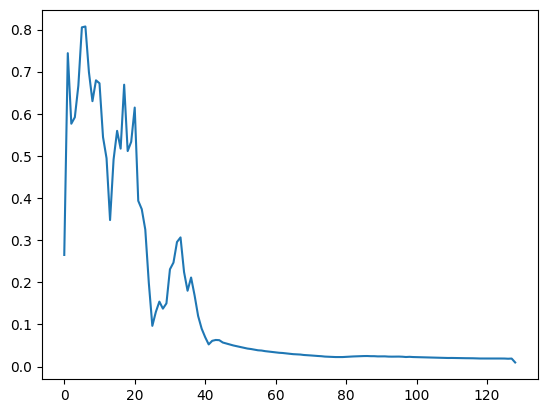

(19.00566626317025, 0.2415292638924322, 4.590424582328744, 4.146186822862492)

In [580]:
psd_score(ex_signal_arr_spatch[1244][:1280],1) #3점이긴 한데...

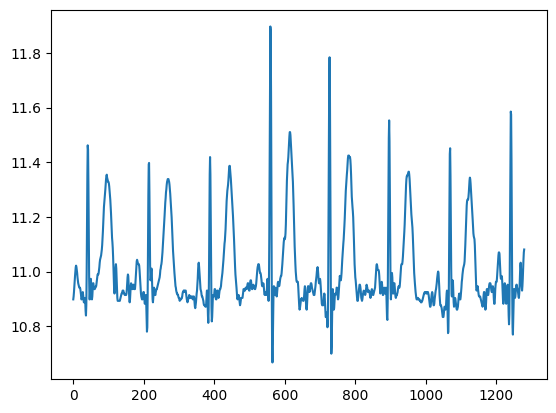

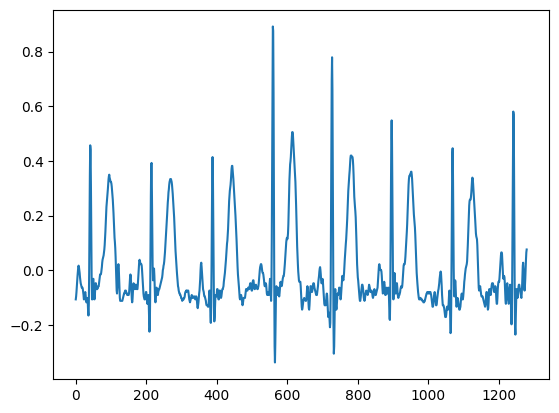

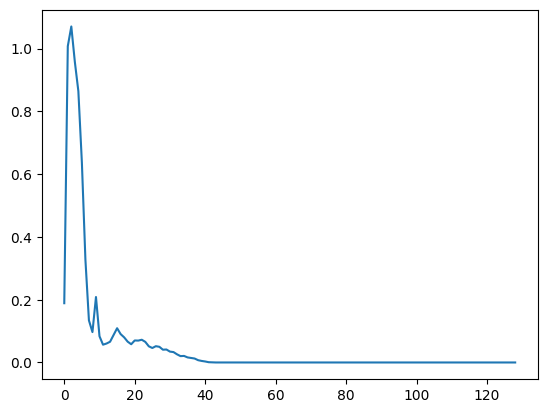

(7.006918298645314,
 0.06453548293878208,
 0.45219485631566464,
 1.0051542190258107)

In [581]:
psd_score(ex_signal_arr_spatch[789][:1280],1) #7점 정상

#### 경계 ( psd : 25 ~ 50)

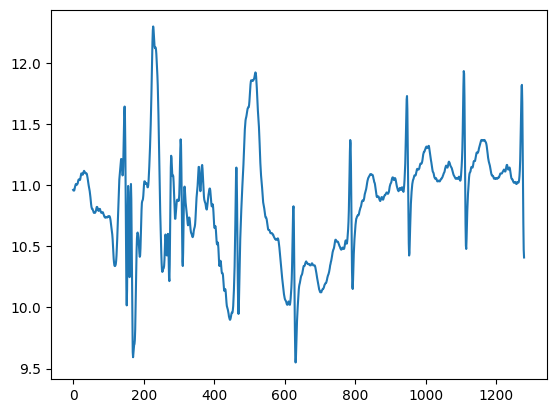

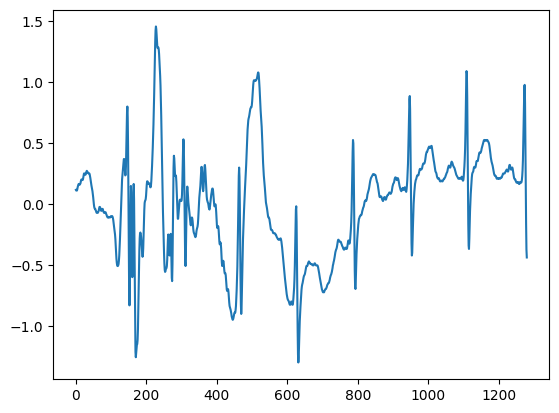

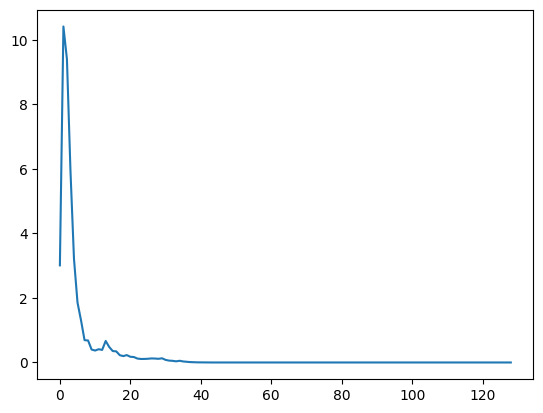

(42.22417783111343,
 0.02334508711402674,
 0.9857271097854997,
 1.2275022839539522)

In [582]:
psd_score(ex_signal_arr_spatch[1001][:1280],1) #30점은 경계

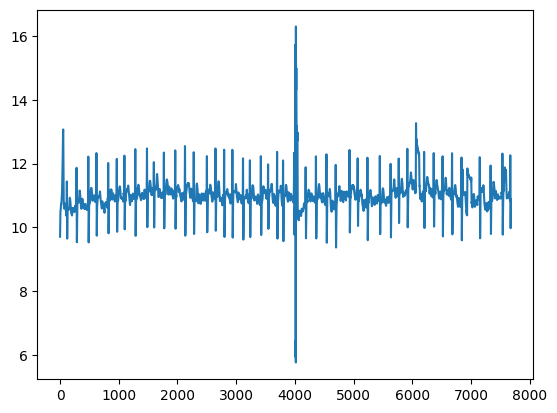

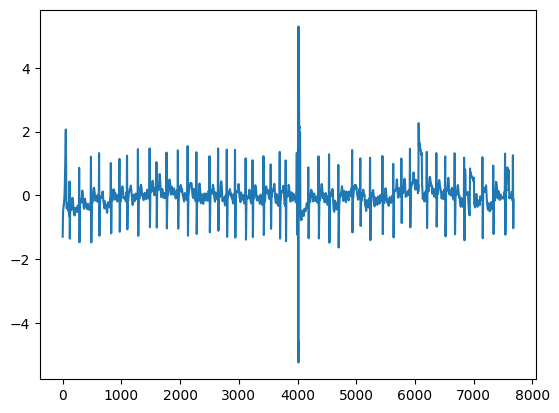

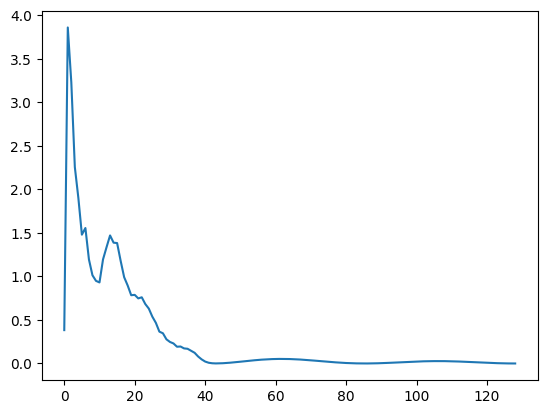

(38.335307408365914, 0.1115158373720811, 4.274993906560069, 0.7908372195569381)

In [583]:
psd_score(ex_signal_arr_spatch[222],1) #38점은 경계

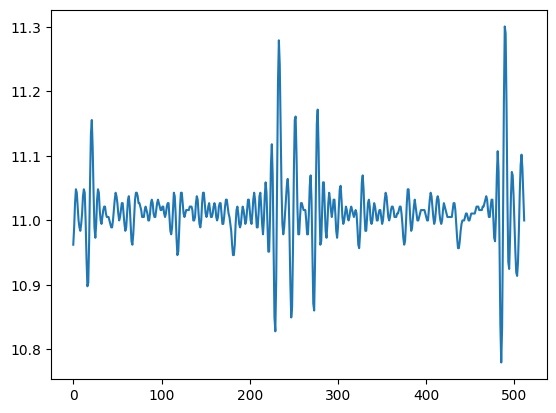

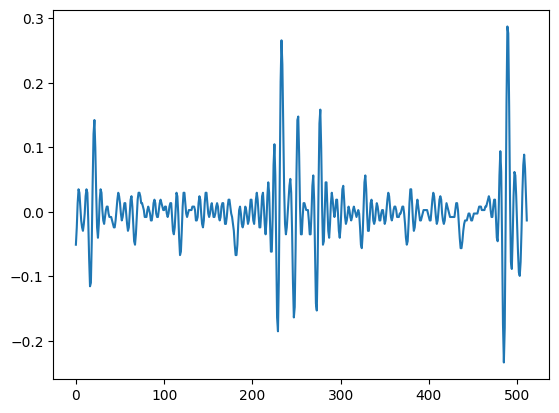

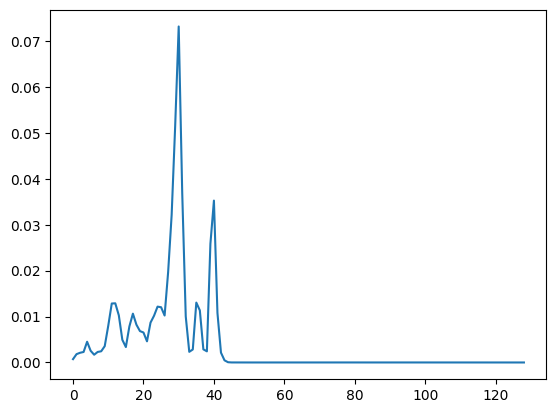

(0.5074929453816238, 2.336908872560064, 1.1859647668239566, 1.0324228942010407)

In [584]:
psd_score(ex_signal_arr_spatch[899][:512],1) #40점대는 경계

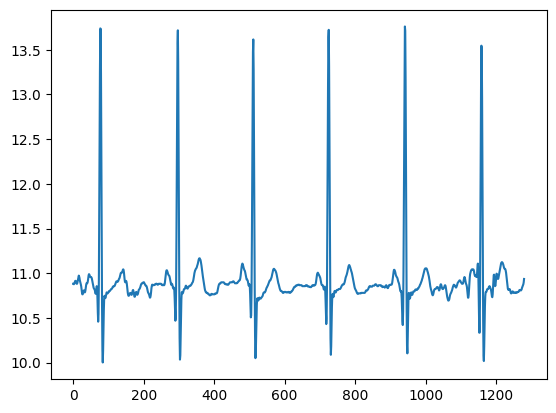

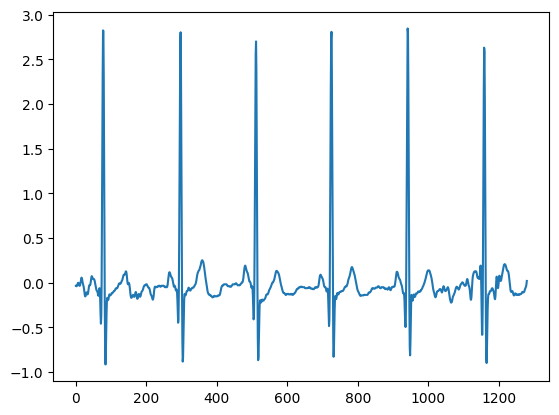

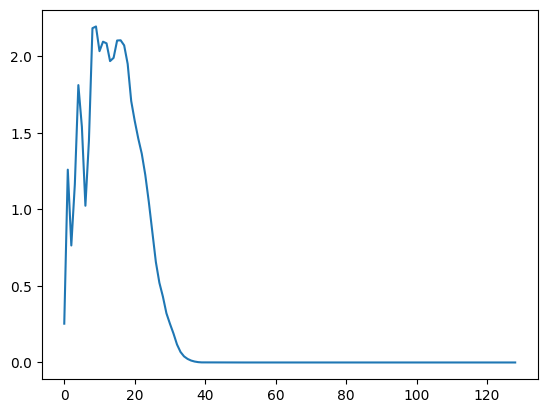

(43.89970738247152,
 0.08637962379431778,
 3.7920402083785247,
 0.9947174090304814)

In [585]:
psd_score(ex_signal_arr_spatch[999][:1280],1) #50점은 경계

#### 일부 비정상 Sample  (psd : 50~ 200)

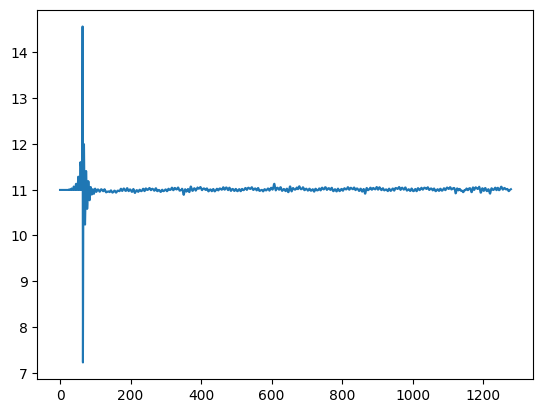

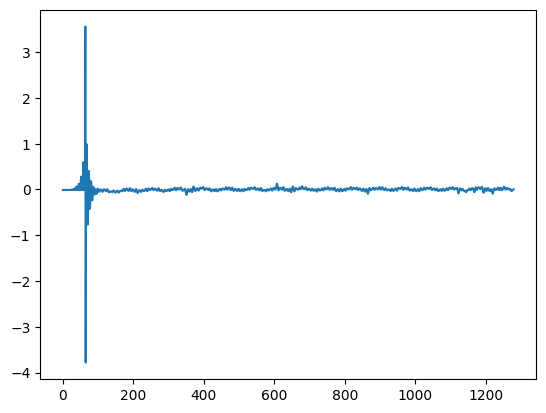

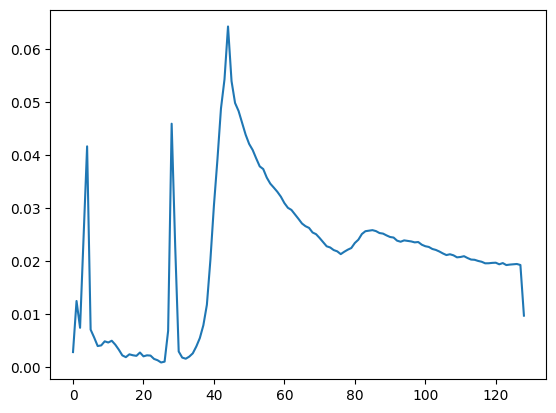

(2.711551888270989, 4.023037138896443, 10.908673950558967, 2.271714894613006)

In [586]:
psd_score(ex_signal_arr_spatch[3][:1280],1) #58점대는 일부 비정상

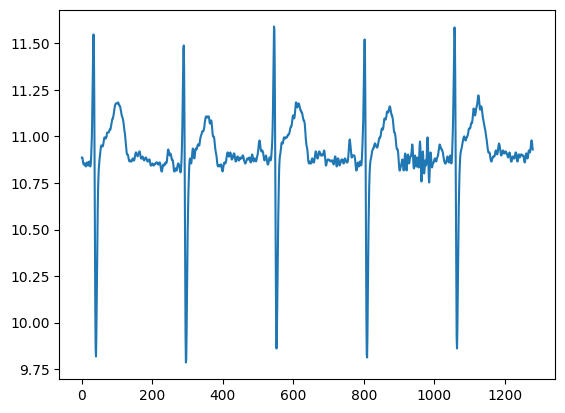

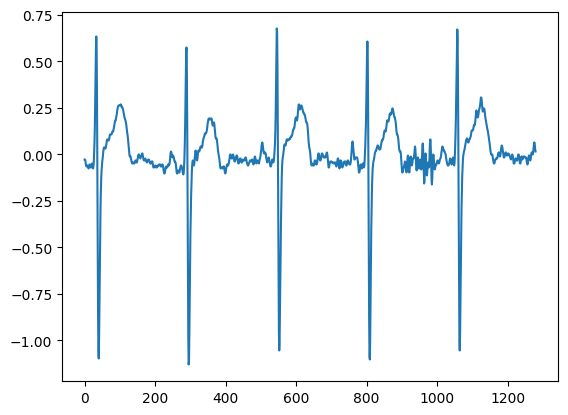

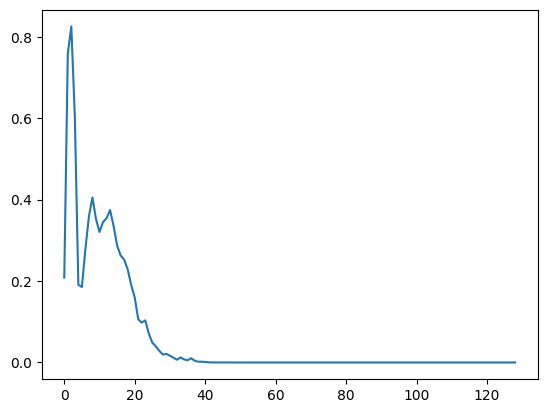

(7.8914570993105695,
 0.031038093405495158,
 0.24493578255385934,
 1.3088182328725324)

In [587]:
psd_score(ex_signal_arr_spatch[460][:1280],1) #100점대는 일부 비정상

In [210]:
order = 3
fs = 256
sos = signal.butter(order, [45, 80.0], 'band', fs=fs, output='sos')
filtered = signal.sosfilt(sos, ex_signal_arr_spatch[460])

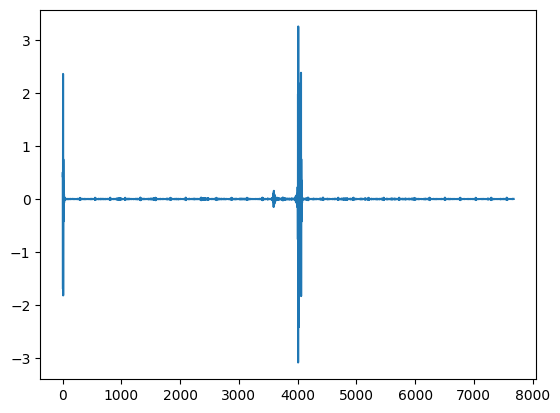

In [211]:
plt.plot(filtered)
plt.show()

In [213]:
sos = signal.butter(order, [0.9, 45.0], 'band', fs=fs, output='sos')
filtered = signal.sosfilt(sos, ex_signal_arr_spatch[460])

#### 외과 수술로 잡음을 도려내는 방법도 필요

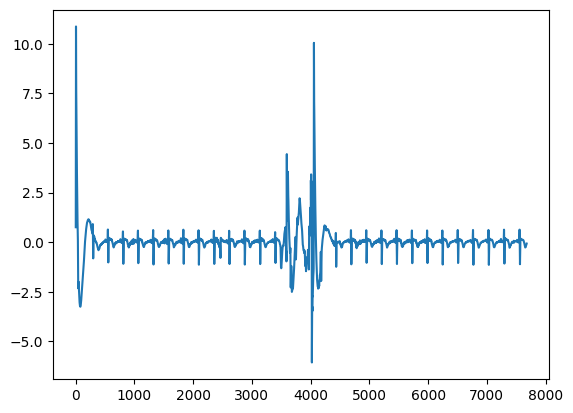

In [207]:
plt.plot(filtered)
plt.show()

In [235]:
modified_filtered = np.hstack([filtered[150:3500],filtered[3500:4200]/8,filtered[4200:]])

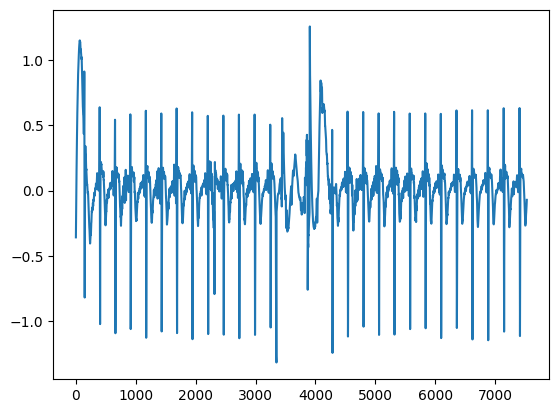

In [236]:
plt.plot(modified_filtered)
plt.show()

#### 대부분 비정상 (PSD : 200 초과)

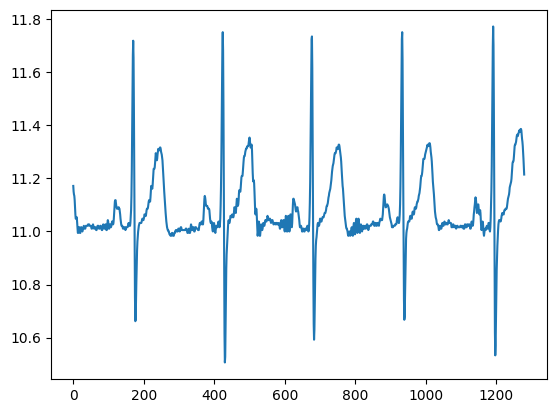

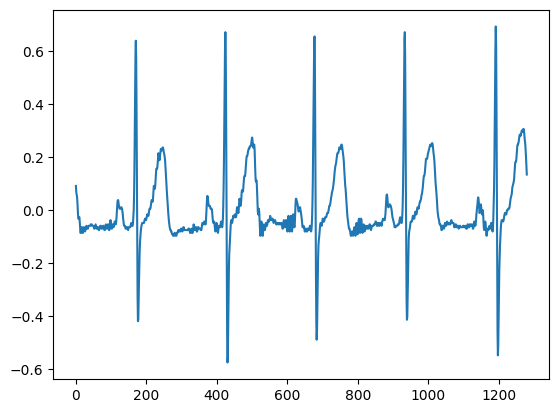

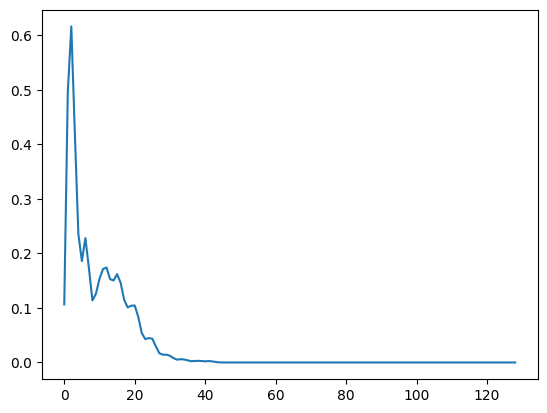

(4.640405788267249,
 0.03989776315269268,
 0.1851418110726709,
 0.8336646914024762)

In [588]:
psd_score(ex_signal_arr_spatch[332][:1280],1) #1675점대는 비정상

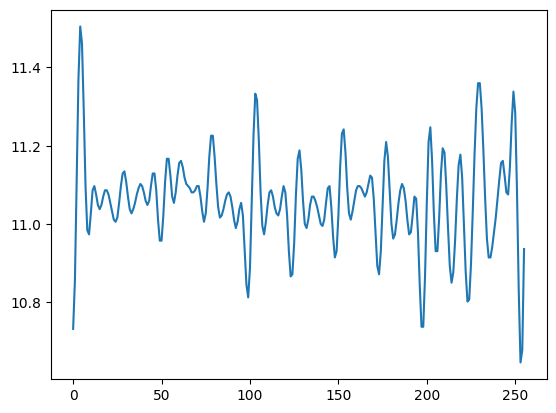

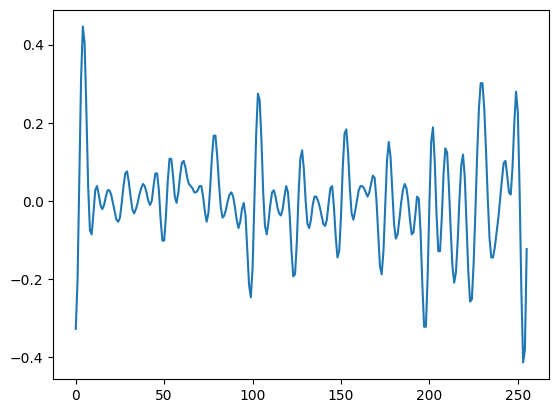

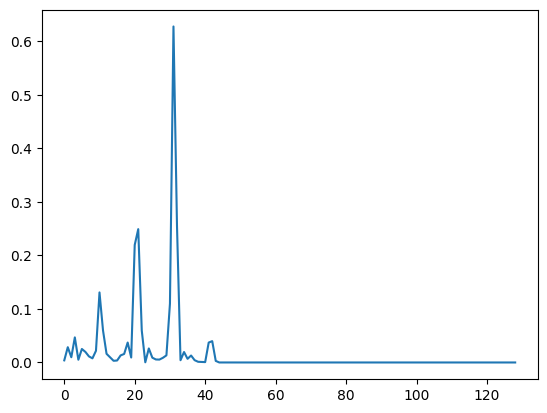

(2.200125269128556, 1.1273587051237157, 2.4803303745147356, 0.7014355336233196)

In [589]:
psd_score(ex_signal_arr_spatch[457][0:256],1) #457점대는 비정상

#### 정규화를 하고 나면 더 정확해 질 수 있겠지만 현재 상태도 증폭된 상태라 괜찮을 듯

### 200점 넘으면 신호 삭제

In [20]:
sum_list = []
std_list = []
for i in ex_signal_arr_spatch:
    sum_psd,std_psd = psd_score(i)
    sum_list.append(sum_psd)
    std_list.append(std_psd)

In [24]:
df = pd.DataFrame(sum_list,columns=['sum'])

In [25]:
df['std'] = std_list

In [39]:
df[df['sum']>1000]

sum        std
105   1136.363279  18.874062
117   1815.247861  22.006897
118   1833.525462  27.133939
127   1319.199393  24.253623
221   1683.305323  21.054342
290   1808.193656  31.781957
310   1606.818074  33.458823
332   1675.049704  18.473927
339   1010.166318  12.461820
399   1629.379665  17.547918
443   1457.457337  18.034578
456   1057.826278  24.681682
457   1225.690822  14.632586
476   1671.387018  14.074672
504   1935.744933  24.030883
557   1478.189835  21.500524
579   2445.803348  49.645471
580   1728.200177  14.063969
658   2065.648807  16.153728
661   1310.045776  22.975861
680   1983.005251  29.277916
695   1595.648700  20.220787
753   1198.791174  18.593752
855   1713.536717  26.148739
885   1243.964109  16.666601
901   1915.709686  27.877822
989   2015.916934  28.731131
1021  1079.808093  18.249242
1028  1353.806364  11.704212
1079  2022.972823  27.238102
1153  1400.262234  18.908978
1162  1467.204450  22.093117
1181  2044.374988  34.219002
1182  2379.352986  39.381742
1197  1787.555455  19.725747
1230  1646.690380  19.183182
1237  1456.175722  22.022431
1250  1687.935878  25.668023
1252  1954.781619  26.247753
1266  1397.399133  14.783548
1345  1604.676740  29.518000

### 윈도우 적을 때 PSD 계산

#### 0.2 ~ 0.3 초 비트 크기 기준

#### 왜곡 되더라도 비트 잡는 데 주력